# Data Viz

In [587]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  # Plotting
import seaborn as sns            # Statistical plotting
from datetime import datetime
import numpy as np
import scipy.stats as st
from scipy.stats import f_oneway


## Functions

In [588]:

# Calculate confidence Intervals using the t Distribution


# define sample data
gfg_data = [1, 1, 1, 2, 2, 2, 3, 3, 3, 3, 
            3, 4, 4, 5, 5, 5, 6, 7, 8, 10]
  
# create confidence interval
st.t.interval(alpha=0.95, df=len(gfg_data)-1,
              loc=np.mean(gfg_data),
              scale=st.sem(gfg_data))                 

(2.7647191216978007, 5.035280878302199)

In [589]:
#Calculate confidence Intervals using the Normal Distribution

# define sample data
gfg_data = np.random.randint(5, 10, 100)

# create confidence interval
# for population mean weight
st.norm.interval(alpha=0.95,
                 loc=np.mean(gfg_data),
                 scale=st.sem(gfg_data))



(6.709348210641782, 7.270651789358219)

In [590]:
def norm_ci_95(data,rndnr=3):
    

    interval=st.norm.interval(alpha=0.95,
                            loc=np.mean(data),
                            scale=st.sem(data,nan_policy='omit'))
    return (round(interval[0],rndnr),round(interval[1],rndnr))

In [591]:
#my ci function
def ci_95(x,rndnr=3):

    mean = x.mean()
    std = x.std()
    n = len(x)

    # Calculate the standard error
    se = std / np.sqrt(n)

    # Calculate the margin of error
    me = t.ppf(0.95, n-1)*se

    # Calculate the lower and upper bounds of the confidence interval
    lower_bound = round(mean - me, rndnr)
    upper_bound = round(mean + me, rndnr)
    return lower_bound,upper_bound

In [592]:
rndnr=3

## All in local silos

In [599]:
final_df_silos_reg=pd.read_csv("results/reg_result_all_in_all_df_2023013011.csv",index_col=0)


In [616]:
final_df_silos_class=pd.read_csv("results/classif_result_all_in_all_df_2023020122.csv",index_col=0)


In [617]:
final_df_silos = pd.concat([final_df_silos_reg,final_df_silos_class])


In [618]:
final_df_silos.reset_index(inplace=True,drop=True)

In [619]:
final_df_silos.replace('roc_auc_score','AUROC',inplace=True)

final_df_silos["metric"]=final_df_silos["metric"].apply(str.upper)

In [620]:
final_df_silos[final_df_silos["value"].isna()]

,target,silo,metric,model,method,experiment,value


## Heatmaps

In [621]:
heatmap_df= final_df_silos.copy()

In [622]:
var_mapping={'IDADE_MATERNA': 'IA',
 'GS': 'GS',
 'PESO_INICIAL': 'PI',
 'PESO_ADMISSAO_INTERNAMENTO': 'PAI',
 'IMC': 'IMC',
 'CIGARROS': 'CIG',
 'ALCOOL': 'ALC',
 'ESTUPEFACIENTES': 'ESTP',
 'A_PARA': 'APARA',
 'A_GESTA': 'AGESTA',
 'EUTOCITO_ANTERIOR': 'EA',
 'VENTOSAS_ANTERIOR': 'VA',
 'FORCEPS_ANTERIOR': 'FA',
 'CESARIANAS_ANTERIOR': 'CA',
 'TIPO_GRAVIDEZ': 'TG',
 'VIGIADA': 'V',
 'NUMERO_CONSULTAS_PRE_NATAL': 'NRCPN',
 'VIGIADA_HOSPITAL': 'VH',
 'VIGIADA_PARICULAR': 'VP',
 'VIGIADA_CENTRO_SAUDE': 'VCS',
 'VIGIADA_NESTE_HOSPITAL': 'VNH',
 'E_ALT_UT': 'EALTUT',
 'BACIA': 'B',
 'APRESENTACAO_ADMISSAO': 'AA',
 'BISHOP_SCORE': 'BS',
 'BISHOP_CONSISTENCIA': 'BC',
 'BISHOP_DESCIDA': 'BDE',
 'BISHOP_DILATACAO': 'BDI',
 'BISHOP_EXTINCAO': 'BE',
 'BISHOP_POSICAO': 'BP',
 'IDADE_GESTACIONAL_ADMISSAO': 'IGA',
 'TRAB_PARTO_ENTRADA_ESPONTANEO': 'TPEE',
 'TRAB_PARTO_ENTRADA_INDUZIDO': 'TPEI',
 'RPM': 'RPM',
 'HIPERTENSAO_CRONICA': 'HC',
 'HIPERTENSAO_GESTACIONAL': 'HG',
 'HIPERTENSAO_PRE_ECLAMPSIA': 'HPE',
 'DIABETES_GESTACIONAL': 'DG',
 'DIABETES_GESTACIONAL_DIETA': 'DGD',
 'DIABETES_GESTACIONAL_INSULINA': 'DGI',
 'DIABETES_GESTACIONAL_ANTIBIO': 'DGA',
 'DIABETES_MATERNA': 'DM',
 'DIABETES_TIPO1': 'DT1',
 'DIABETES_TIPO2': 'DT2',
 'HEMATOLOGICA': 'H',
 'RESPIRATORIA': 'R',
 'CEREBRAL': 'CE',
 'CARDIACA': 'CARD',
 'TIPO_PARTO': 'TP',
 'APRESENTACAO_NO_PARTO': 'ANP',
 'TRAB_PARTO_NO_PARTO': 'TPNP',
 'SEMANAS_GESTACAO_PARTO': 'SGP',
 'GRUPO_ROBSON': 'GR'}

def get_initial(x):
    #print(var_mapping[x])
    return var_mapping[x]
heatmap_df["target"]=heatmap_df["target"].apply(lambda x: get_initial(x))

In [623]:
heatmap_df["silo"].replace("silo","",   inplace=True,regex=True)

In [624]:
heatmap_df["method"].replace("decisionTree","DT",   inplace=True)
heatmap_df["method"].replace("NaiveBayes","NB",   inplace=True)
heatmap_df["method"].replace("ADABOOST","ADA",   inplace=True)


In [625]:
cross_df=heatmap_df[heatmap_df["metric"].isin(["AUROC"])]


crosstab1 = pd.crosstab(index=[cross_df['method'],cross_df['silo']],
                        columns=[cross_df['target'],cross_df['model']],
                        values=cross_df['value'],
                        aggfunc='mean')

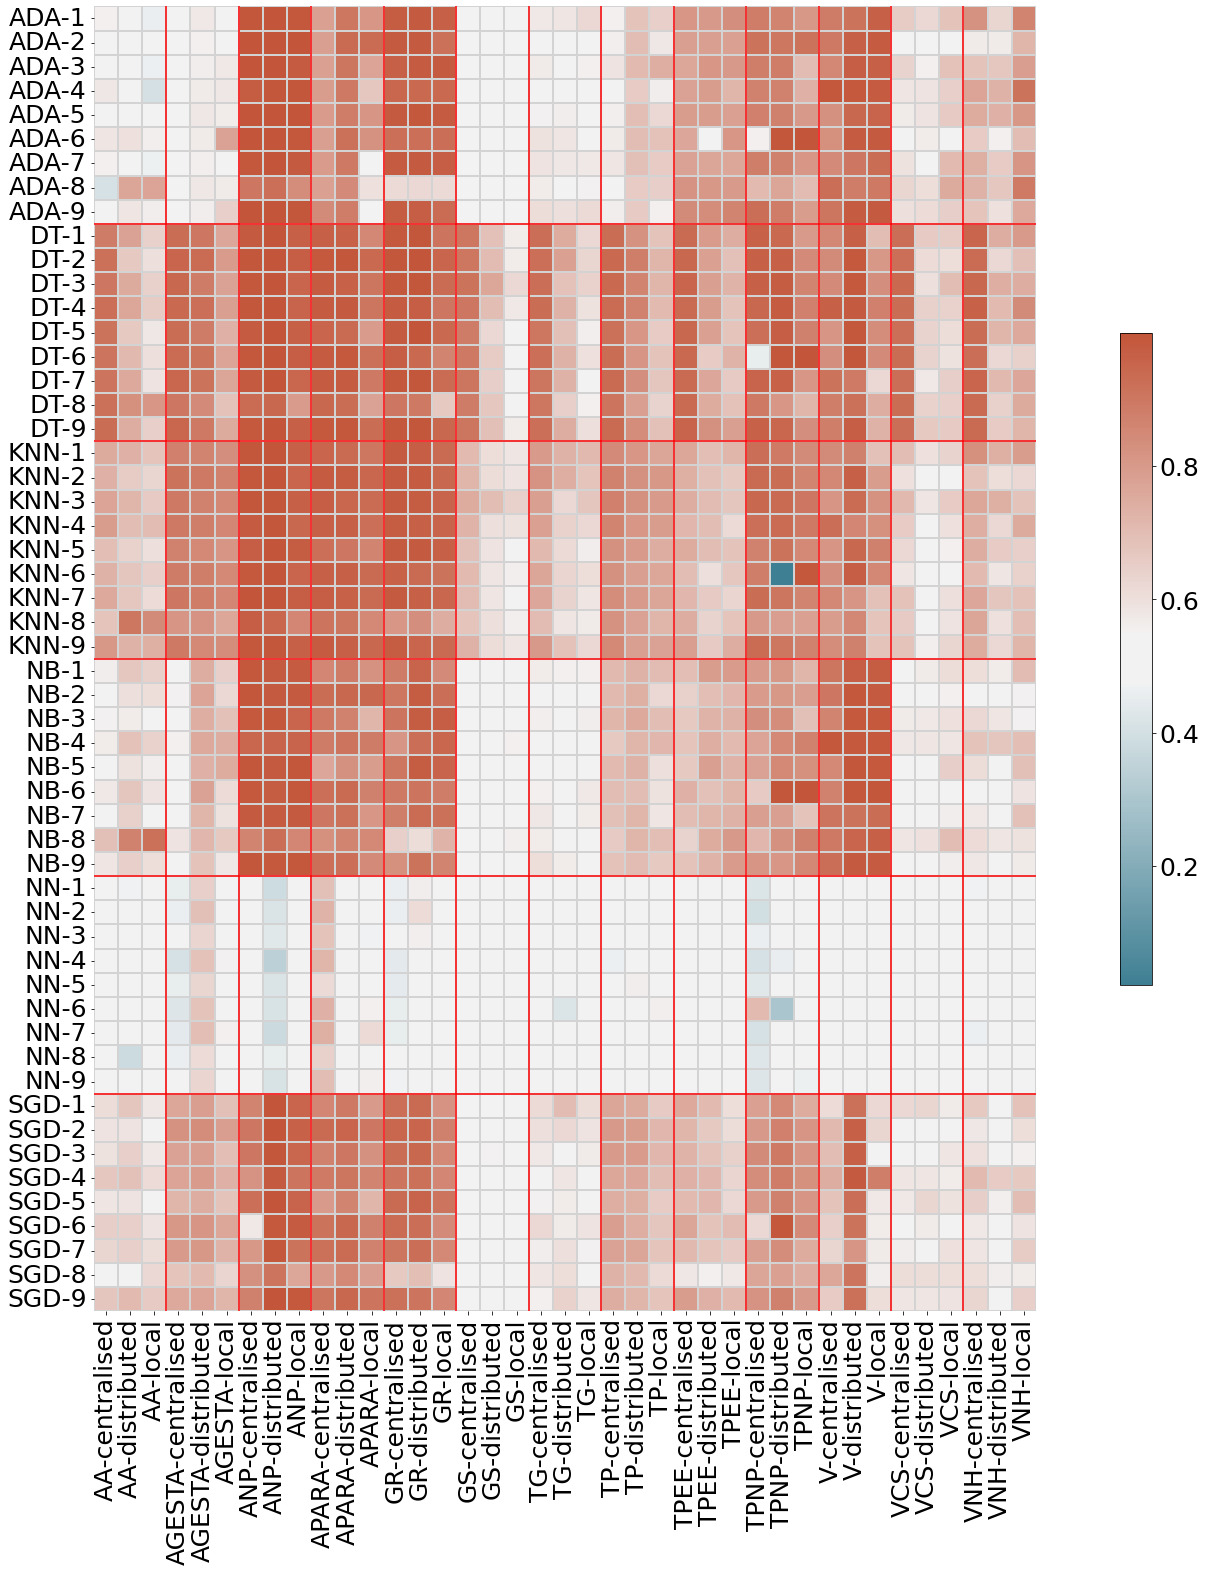

In [626]:
fig, ax = plt.subplots(figsize=(30, 24))

cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)

sns.heatmap(crosstab1,
            #annot = True,
            #cbar = True,
            cbar=False,

          #  cmap = sns.color_palette("Reds", 8),
            #cmap="YlGnBu",
          #  annot_kws={"size":15},
           # cmap="PiYG",
            cmap=cmap,
            linewidths=0.1,linecolor="lightgrey",
            ax = ax)
# Rotate tick marks for visibility
plt.yticks(rotation=0)
plt.xticks(rotation=90)

plt.tick_params(axis='both', which='major', labelsize=25)

ax.hlines([9, 18, 27,36,45],color="red", *ax.get_xlim())
ax.vlines([3, 6, 9,12,15,18,21,24,27,30,33,36,],color="red", *ax.get_ylim())


cmapProp={"shrink":0.5}
m = ax.imshow(crosstab1, cmap=plt.cm.get_cmap(cmap))
cbar = ax.figure.colorbar(m, ax=ax,**cmapProp)
cbar.ax.tick_params(labelsize=25)  # set your label size here


x_axis = ax.xaxis
x_axis.label.set_visible(False)

y_axis = ax.yaxis
y_axis.label.set_visible(False)

plt.savefig('Vizs/heatmap-class.png',bbox_inches='tight')

#Show the plot
plt.show()

In [629]:
cross_df2=heatmap_df[heatmap_df["metric"].isin(["MAE"])]


crosstab2 = pd.crosstab(index=[cross_df2['method'],cross_df2['silo']],
                        columns=[cross_df2['target'],cross_df2['model']],
                        values=cross_df2['value'],
                        aggfunc='mean')

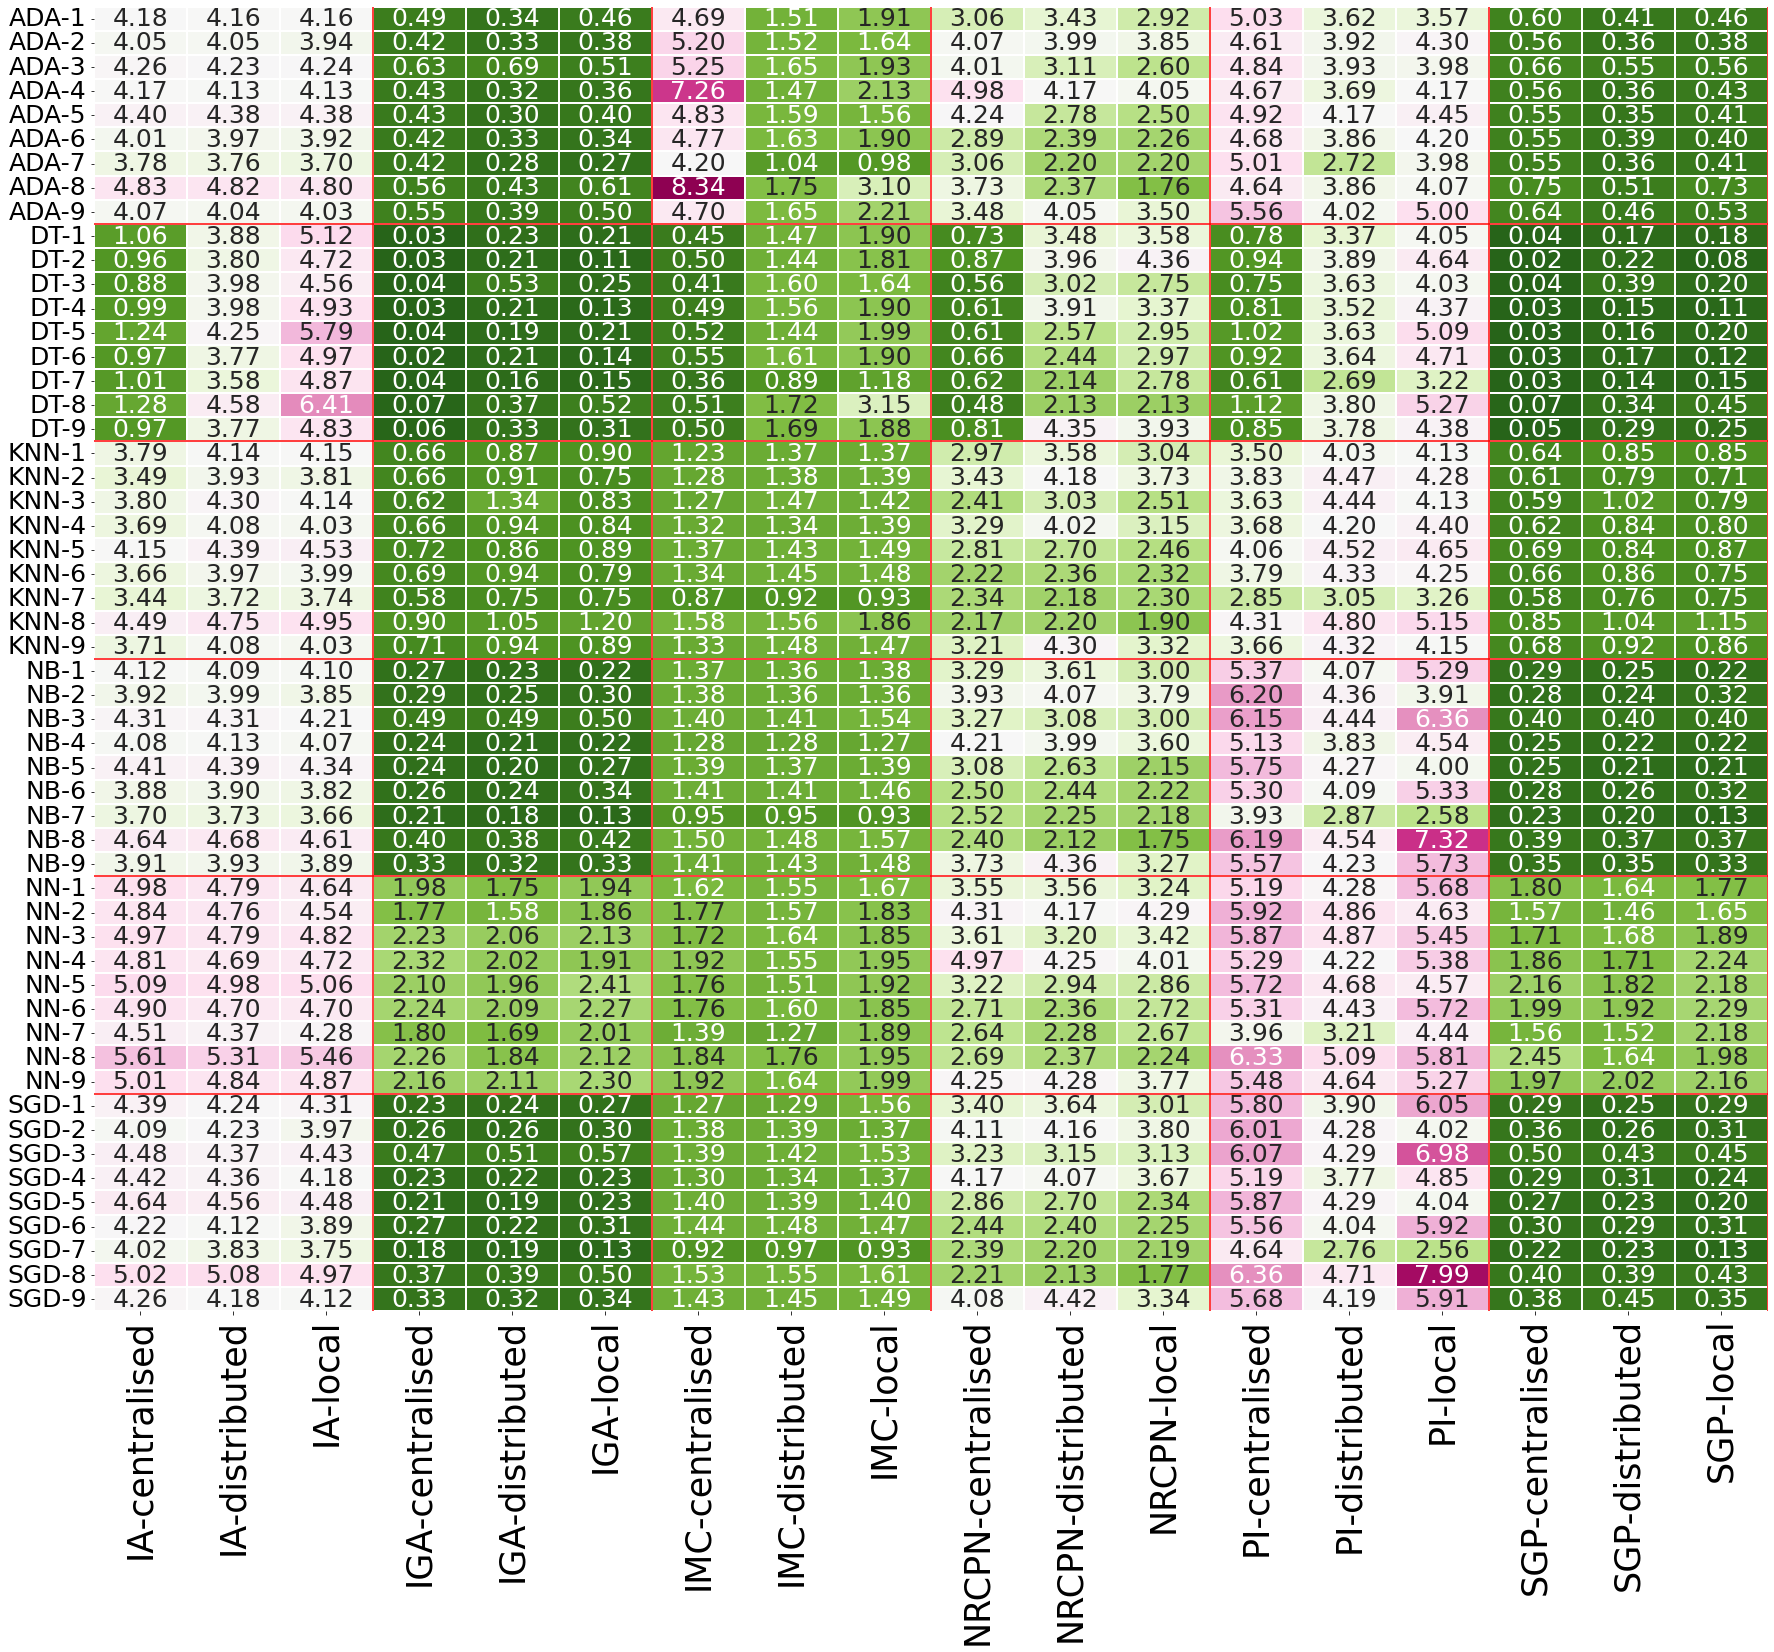

In [806]:
fig, ax = plt.subplots(figsize=(30, 24))
sns.heatmap(crosstab2,
            annot = True,
            #cbar = True,
            cbar=False,

          #  cmap = sns.color_palette("Reds", 8),
            #cmap="YlGnBu",
            annot_kws={"size":25},
            cmap="PiYG_r",
            linewidths=0.1,fmt=".2f",
            ax = ax)
# Rotate tick marks for visibility
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.tick_params(axis='both', which='major', labelsize=25)
plt.tick_params(axis='x', which='major', labelsize=35)

ax.hlines([9, 18, 27,36,45],color="red", *ax.get_xlim())
ax.vlines([3, 6, 9,12,15,18,21,24,27,30,33,36,],color="red", *ax.get_ylim())


x_axis = ax.xaxis
x_axis.label.set_visible(False)

y_axis = ax.yaxis
y_axis.label.set_visible(False)


plt.savefig('Vizs/heatmap-reg.png',bbox_inches='tight')

#Show the plot
plt.show()

## Per Column

In [631]:
percolumn=final_df_silos.groupby(["target","metric","model"]).agg({"value":["mean","std",norm_ci_95]})
percolumn.reset_index(inplace=True)
percolumn

target metric        model     value            \
                                                     mean       std   
0     APRESENTACAO_ADMISSAO  AUPRC  centralised  0.742767  0.130901   
1     APRESENTACAO_ADMISSAO  AUPRC  distributed  0.727335  0.119813   
2     APRESENTACAO_ADMISSAO  AUPRC        local  0.701580  0.123370   
3     APRESENTACAO_ADMISSAO  AUROC  centralised  0.646127  0.147498   
4     APRESENTACAO_ADMISSAO  AUROC  distributed  0.631798  0.112776   
..                      ...    ...          ...       ...       ...   
109  VIGIADA_NESTE_HOSPITAL  AUPRC  distributed  0.727814  0.151800   
110  VIGIADA_NESTE_HOSPITAL  AUPRC        local  0.772042  0.138441   
111  VIGIADA_NESTE_HOSPITAL  AUROC  centralised  0.686809  0.146377   
112  VIGIADA_NESTE_HOSPITAL  AUROC  distributed  0.599828  0.079588   
113  VIGIADA_NESTE_HOSPITAL  AUROC        local  0.667084  0.115420   

                     
         norm_ci_95  
0    (0.732, 0.754)  
1    (0.717, 0.737)  
2    (0.691, 0.712)  
3    (0.634, 0.659)  
4    (0.622, 0.641)  
..              ...  
109  (0.715, 0.741)  
110   (0.76, 0.784)  
111  (0.674, 0.699)  
112  (0.593, 0.607)  
113  (0.657, 0.677)  

[114 rows x 6 columns]

## Significance testing

In [632]:
def sig_(s1,s2):
    h=st.ttest_ind(a=s1, b=s2)[1]
    if h<0.05:
        if np.mean(s1)>np.mean(s2):
            return "Better than "
        else:
            return "Worse than "
    else:
        return "Equal to "


In [668]:

_l=[]
for t in final_df_silos["target"].unique():
    for me in ["AUROC","MAE"]:
        for s in range(1,10):
            #print(s)
            for alg in final_df_silos["method"].unique():
                c=final_df_silos[(final_df_silos["target"]==t)& (final_df_silos["method"]==alg) & (final_df_silos["metric"]==me)& (final_df_silos["silo"]=="silo"+str(s)) & (final_df_silos["model"]=="centralised")]["value"].values
                d=final_df_silos[(final_df_silos["target"]==t)& (final_df_silos["method"]==alg) & (final_df_silos["metric"]==me) & (final_df_silos["silo"]=="silo"+str(s))& (final_df_silos["model"]=="distributed")]["value"].values
                l=final_df_silos[(final_df_silos["target"]==t) & (final_df_silos["method"]==alg)& (final_df_silos["metric"]==me)& (final_df_silos["silo"]=="silo"+str(s))  & (final_df_silos["model"]=="local")]["value"].values
                if len(c)>0:
                    _l.append(sig_(d,l)+"Local,"+sig_(d,c)+"Centralised")





In [669]:
from collections import Counter
cc=Counter(_l)

In [670]:
cc

Counter({'Equal to Local,Worse than Centralised': 90,
         'Worse than Local,Better than Centralised': 85,
         'Equal to Local,Equal to Centralised': 83,
         'Better than Local,Worse than Centralised': 182,
         'Equal to Local,Better than Centralised': 90,
         'Better than Local,Better than Centralised': 251,
         'Better than Local,Equal to Centralised': 50,
         'Worse than Local,Worse than Centralised': 170,
         'Worse than Local,Equal to Centralised': 25})

In [696]:
dd=pd.DataFrame(cc,index=[0])

In [697]:
idx = dd.columns.str.split(',', expand=True)
dd.columns=idx

In [698]:
tt=pd.DataFrame({k:0 for k in dd.columns.levels[0]},index=list(dd.columns.levels[1]))
tt

,Better than Local,Equal to Local,Worse than Local
Better than Centralised,0,0,0
Equal to Centralised,0,0,0
Worse than Centralised,0,0,0


In [699]:
for c1 in dd.columns.levels[0]:
    for c2 in dd.columns.levels[1]:
        tt.loc[c2,c1]=dd[c1,c2].values[0]

In [700]:
tt.columns=[k.replace("Distributed ","") for k in tt.columns]

In [701]:
tt["Row Total"]=tt.sum(axis=1)
tt.loc['Total']= tt.sum(numeric_only=True, axis=0)


In [702]:
tt

,Better than Local,Equal to Local,Worse than Local,Row Total
Better than Centralised,251,90,85,426
Equal to Centralised,50,83,25,158
Worse than Centralised,182,90,170,442
Total,483,263,280,1026


In [703]:
kk=tt.reset_index()

In [704]:
kk["index"].replace("Better than ","+ ",inplace=True,regex=True)
kk["index"].replace("Equal to ","=  ",inplace=True,regex=True)
kk["index"].replace("Worse than ","-  ",inplace=True,regex=True)


In [705]:
kk.columns=["","+ Local",	"= Local",	"- Local",	"Total"]

In [731]:
f = open("Vizs/significance.tex", "w")

s = kk.style
s.hide(axis="index")
# get a handle on the row that starts with `"Total"`, i.e., the last row here
last_row = pd.IndexSlice[kk.index[kk.index == 3], :]

# and apply styling to it via the `subset` arg; first arg is styler function above
s.applymap(lambda x: "font-weight: bold;background-color:lightgray", subset=last_row)
s.applymap(lambda x: "font-weight: bold;background-color:lightgray", subset=["Total"])

f.write(s.to_latex(multirow_align="c",position="h",hrules=True,convert_css=True,position_float="centering",label="tab:hyp", caption="Hypothesis testing of Distributed versus Centralised and local for every test.",))
f.close()


## Per Silo

In [707]:
persilo=final_df_silos.groupby(["silo","metric","model"]).agg({"value":["mean","std",norm_ci_95]})
persilo.reset_index(inplace=True)
persilo

silo metric        model      value                             
                                     mean        std        norm_ci_95
0    silo1  AUPRC  centralised   0.710437   0.220987    (0.695, 0.726)
1    silo1  AUPRC  distributed   0.697652   0.207327    (0.683, 0.712)
2    silo1  AUPRC        local   0.656807   0.215538    (0.642, 0.672)
3    silo1  AUROC  centralised   0.738922   0.178843    (0.726, 0.751)
4    silo1  AUROC  distributed   0.734620   0.173386    (0.722, 0.747)
..     ...    ...          ...        ...        ...               ...
103  silo9    MAE  distributed   2.611413   1.676729    (2.438, 2.785)
104  silo9    MAE        local   2.694117   1.791120    (2.509, 2.879)
105  silo9   RMSE  centralised  23.655846  31.136479  (20.439, 26.872)
106  silo9   RMSE  distributed  29.050902  51.344331  (23.747, 34.355)
107  silo9   RMSE        local  27.285722  35.315777  (23.638, 30.934)

[108 rows x 6 columns]

## per Method

In [708]:
permethod=final_df_silos.groupby(["method","model","metric"]).agg({"value":["mean","std",norm_ci_95]})
permethod.reset_index(inplace=True)
permethod

method        model metric      value                             
                                           mean        std        norm_ci_95
0       ADABOOST  centralised  AUPRC   0.677835   0.214368     (0.666, 0.69)
1       ADABOOST  centralised  AUROC   0.708937   0.171659    (0.699, 0.719)
2       ADABOOST  centralised    MAE   3.226928   2.070878    (3.052, 3.402)
3       ADABOOST  centralised   RMSE  22.905222  20.991491  (21.135, 24.676)
4       ADABOOST  distributed  AUPRC   0.691573   0.212072    (0.679, 0.704)
..           ...          ...    ...        ...        ...               ...
67  decisionTree  distributed   RMSE  13.553625  13.542907  (12.411, 14.696)
68  decisionTree        local  AUPRC   0.696075   0.199114    (0.685, 0.707)
69  decisionTree        local  AUROC   0.744278   0.128721    (0.737, 0.752)
70  decisionTree        local    MAE   2.516306   1.975911     (2.35, 2.683)
71  decisionTree        local   RMSE  26.128439  30.759483  (23.534, 28.723)

[72 rows x 6 columns]

## Per Model

In [709]:
permodel=final_df_silos.groupby(["metric","model"]).agg({"value":["mean","std",norm_ci_95]})
permodel.reset_index(inplace=True)
new_columns = [col[1] if len(col[1])>1 else "".join(col) for col in permodel.columns.tolist()  ]
permodel.columns = new_columns

In [710]:
permodel

,metric,model,mean,std,norm_ci_95
0,AUPRC,centralised,0.706079,0.224758,"(0.701, 0.711)"
1,AUPRC,distributed,0.690933,0.216035,"(0.686, 0.696)"
2,AUPRC,local,0.659409,0.219613,"(0.654, 0.665)"
3,AUROC,centralised,0.729490,0.180016,"(0.725, 0.734)"
4,AUROC,distributed,0.722641,0.181530,"(0.718, 0.727)"
5,AUROC,local,0.691643,0.163823,"(0.688, 0.695)"
6,MAE,centralised,2.364558,1.922864,"(2.298, 2.431)"
7,MAE,distributed,2.370055,1.608028,"(2.315, 2.425)"
8,MAE,local,2.526620,1.798910,"(2.465, 2.589)"
9,RMSE,centralised,19.839414,28.645203,"(18.853, 20.826)"


In [798]:

p_value_per_model=[]
p_value_list=[]
for me in permodel["metric"].unique():
        c=final_df_silos[ (final_df_silos["metric"]==me) & (final_df_silos["model"]=="centralised")]["value"].values
        d=final_df_silos[ (final_df_silos["metric"]==me) & (final_df_silos["model"]=="distributed")]["value"].values
        l=final_df_silos[ (final_df_silos["metric"]==me) & (final_df_silos["model"]=="local")]["value"].values

        h1=st.ttest_ind(a=d, b=l)[1]
        print(np.mean(d),np.mean(l))
        h2=st.ttest_ind(a=d, b=c)[1]
        p_value_per_model.append({me+"_"+"D-L":h1,me+"_"+"D-C":h2})
        p_value_list.extend([h1,np.nan,h2])

0.6909334933696398 0.6594087082009983
0.7226410917044349 0.6916434147829792
2.3700552885108856 2.5266203257835467
21.170817665864735 23.770903122529127


In [782]:
permodel_latex=permodel.copy()
permodel_latex.replace('roc_auc_score','AUROC',inplace=True)

permodel_latex["metric"]=permodel_latex["metric"].apply(str.upper)
permodel_latex.set_index(["metric","model"],inplace=True)
permodel_latex.columns=["Mean","Std","95\% CI"]

In [783]:
permodel_latex["p Value"]=p_value_list

In [796]:
def bold_significance(x):
    return 'font-weight: bold' if x < 0.05 else '' 

In [797]:
f = open("Vizs/per_model.tex", "w")

s = permodel_latex.style
s.format({
   "Mean": '{:.3f}',
   "Std": '{:.3f}',
   "p Value": '{:.2e}'},na_rep="-")

s.set_table_styles([
    {'selector': 'toprule', 'props': ':toprule;'},
        {'selector': 'midrule', 'props': ':midrule;'},

    {'selector': 'bottomrule', 'props': ':hline;'},
], overwrite=False)
s.hide(names=True)
s.applymap(bold_significance, subset=["p Value"])

f.write(s.to_latex(multirow_align="c",convert_css=True,position_float="centering",position="htbp",caption="Comparison for centralised model, distributed model and local model (Mean for all model and all columns)",label="tab:allvsall"))
f.close()
